In [1]:
import numpy as np
import pickle
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import *
from sklearn.metrics import *
from itertools import islice
from sklearn.preprocessing import normalize

from sklearn.model_selection import StratifiedKFold
sns.set()
import warnings
warnings.filterwarnings("ignore")
length = 277

c:\Users\alin2\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 843536139311622724
xla_global_id: -1
]


In [3]:
train_values = np.empty(shape=[0, length])
test_values = np.empty(shape=[0, length])

train_beats = glob.glob('./data/train_test/train_beats.csv')
test_beats = glob.glob('./data/train_test/test_beats.csv')

for j in train_beats:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)

for j in test_beats:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

y_train = train_values[:,-2]
y_test = test_values[:,-2]

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

Loading  ./data/train_test/train_beats.csv
Loading  ./data/train_test/test_beats.csv
(31056, 277)
(37442, 277)


In [5]:
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten, Conv1D, MaxPooling1D

def getModel():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=16,padding='same', activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=32, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=9, kernel_size=16,padding='same', activation='relu',name = 'last_conv_layer'))
    cnnmodel.add(MaxPooling1D(pool_size=4,padding='same'))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(256, activation='relu'))
    cnnmodel.add(Dense(128, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return cnnmodel

cnnmodel = getModel()
cnnmodel.summary()

cnnhistory= cnnmodel.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2, batch_size = 64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 275, 128)          2176      
                                                                 
 batch_normalization (BatchN  (None, 275, 128)         512       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 275, 32)           65568     
                                                                 
 batch_normalization_1 (Batc  (None, 275, 32)          128       
 hNormalization)                                                 
                                                                 
 last_conv_layer (Conv1D)    (None, 275, 9)            4617      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 69, 9)            0

In [6]:
def showResults(test, pred, model_name):
    accuracy = accuracy_score(test, pred)
    precision= precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average = 'macro')
    f1score= f1_score(test, pred, average='macro') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1score : {}".format(f1score))
    cm=confusion_matrix(test, pred, labels=[1,2,3,4,5,6,7,8])
    return (model_name, round(accuracy,3), round(precision,3) , round(recall,3) , round(f1score,3), cm)

892/892 [==============================] - 7s 7ms/step
Accuracy  : 0.9317656129529683
Precision : 0.125
Recall : 0.11647070161912104
f1score : 0.12058471363001397


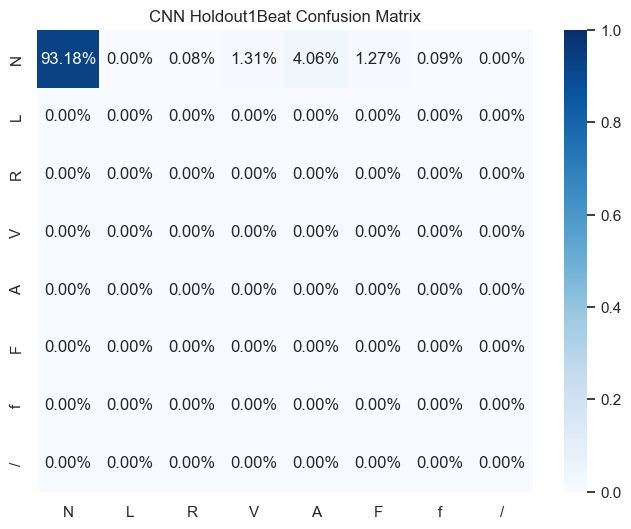

(28534, 11)
(28534, 275)


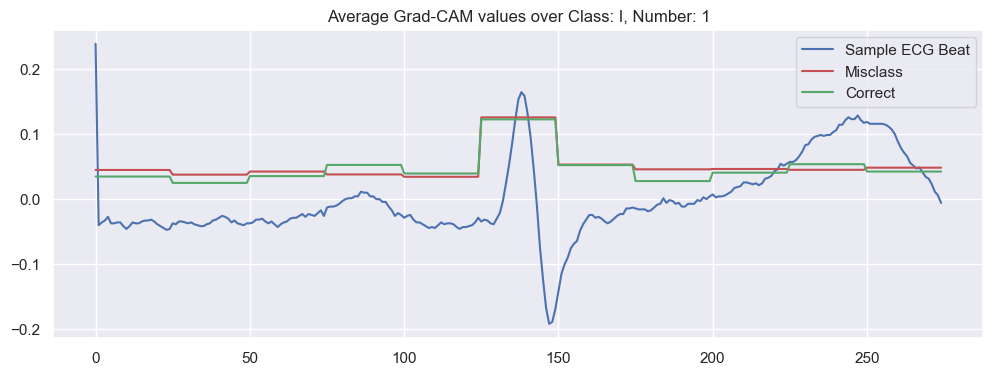

52/52 [==============================] - 0s 8ms/step
Accuracy  : 0.9879445449065702
Precision : 0.2
Recall : 0.19758890898131404
f1score : 0.19878714372346878


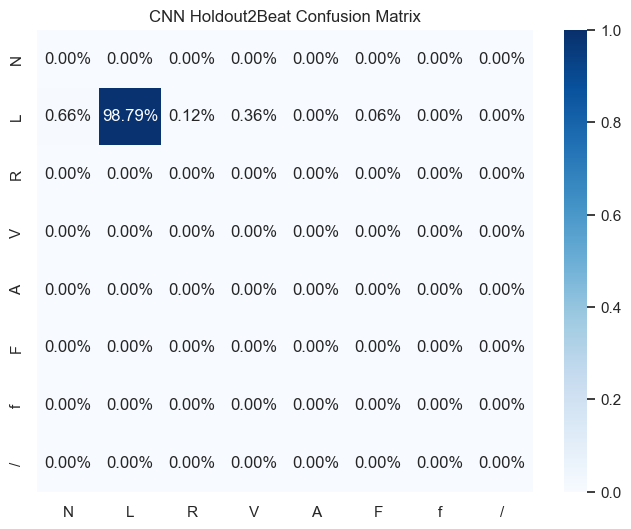

(1659, 11)
(1659, 275)


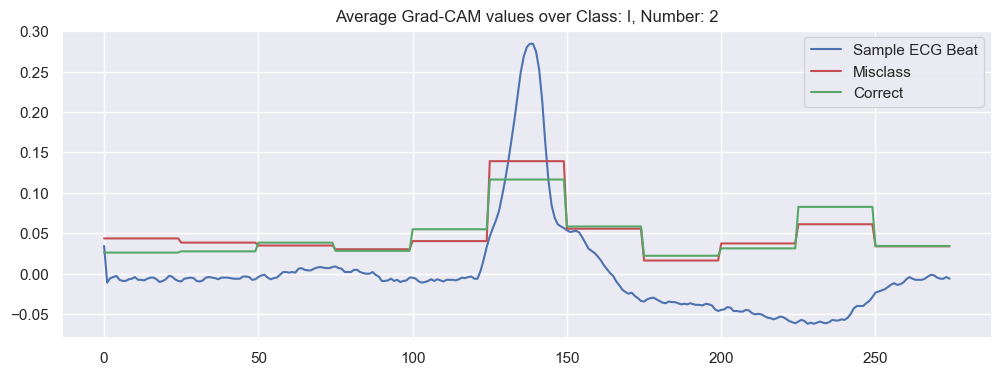

79/79 [==============================] - 1s 7ms/step
Accuracy  : 0.9956245027844073
Precision : 0.25
Recall : 0.24890612569610182
f1score : 0.24945186366354394


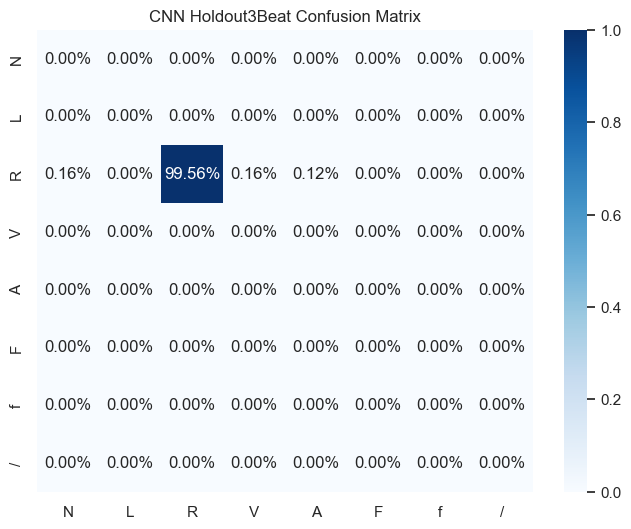

(2514, 11)
(2514, 275)


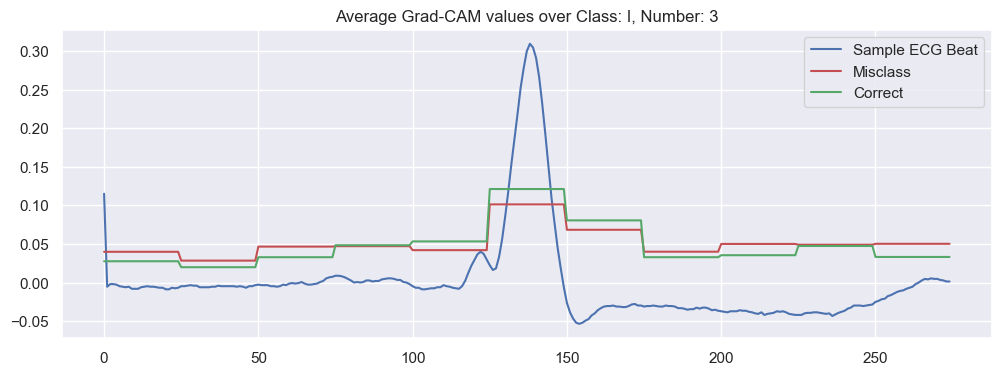

41/41 [==============================] - 0s 8ms/step
Accuracy  : 0.9595419847328245
Precision : 0.25
Recall : 0.23988549618320612
f1score : 0.24483833268406702


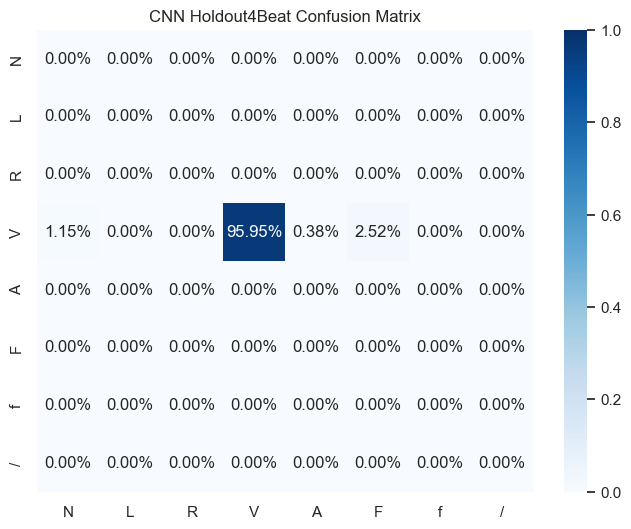

(1310, 11)
(1310, 275)


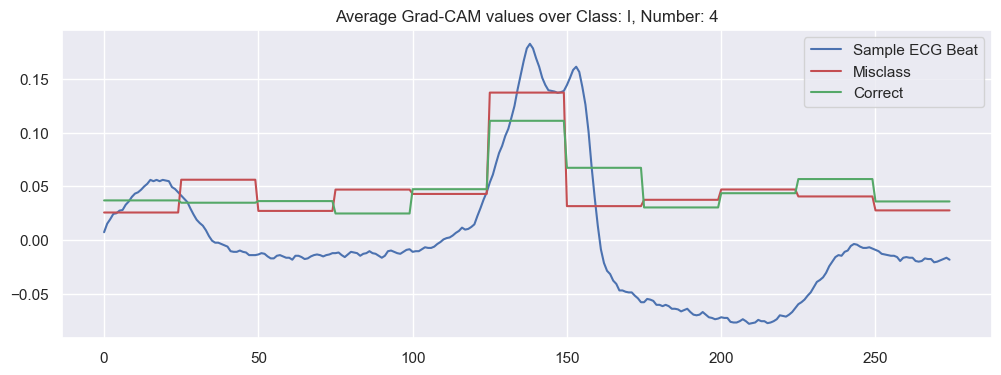

24/24 [==============================] - 0s 8ms/step
Accuracy  : 0.9376657824933687
Precision : 0.2
Recall : 0.18753315649867375
f1score : 0.19356605065023957


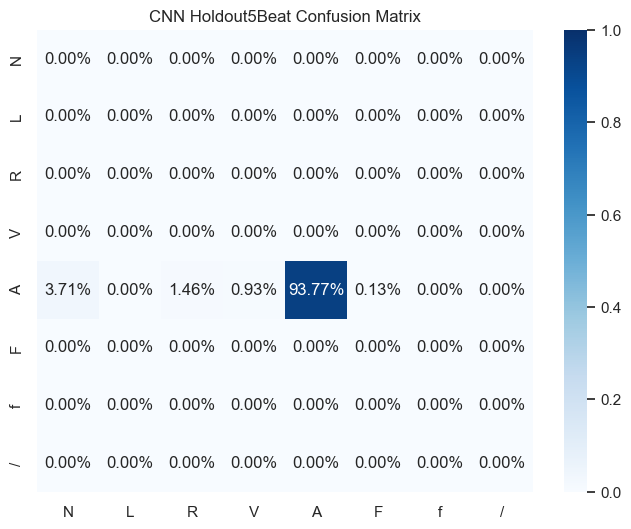

(754, 11)
(754, 275)


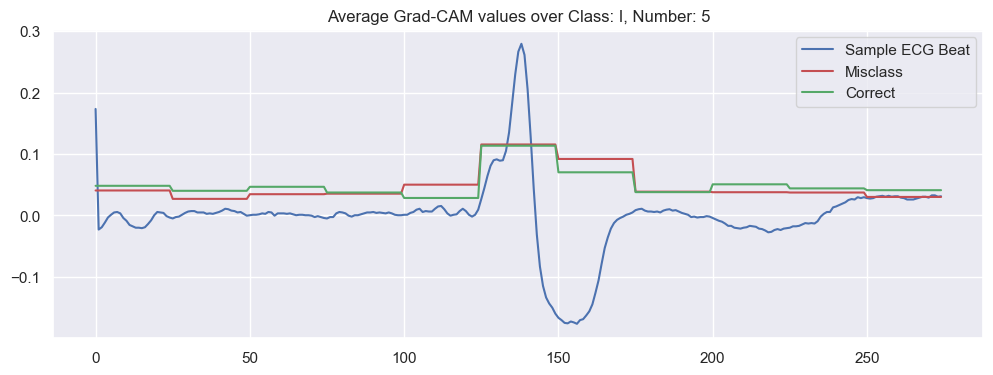

6/6 [==============================] - 0s 8ms/step
Accuracy  : 0.9259259259259259
Precision : 0.25
Recall : 0.23148148148148148
f1score : 0.24038461538461536


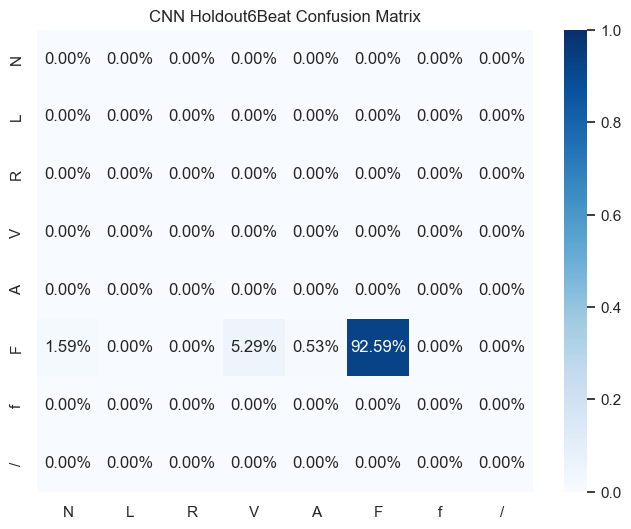

(189, 11)
(189, 275)


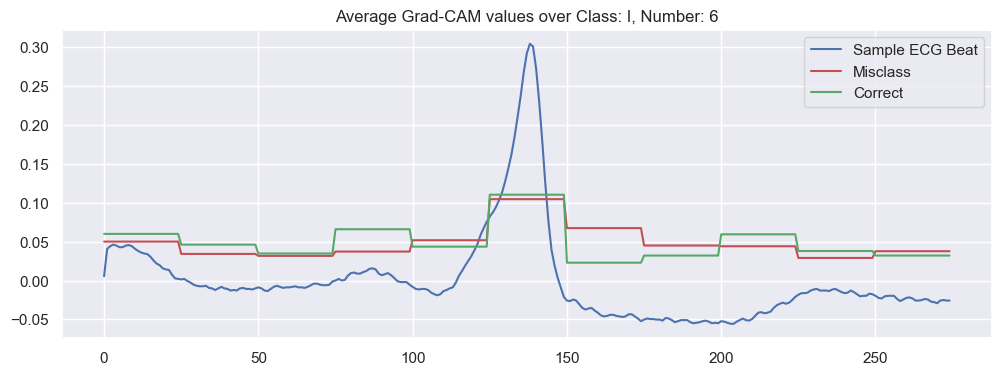

13/13 [==============================] - 0s 7ms/step
Accuracy  : 0.9551122194513716
Precision : 0.16666666666666666
Recall : 0.15918536990856194
f1score : 0.1628401360544218


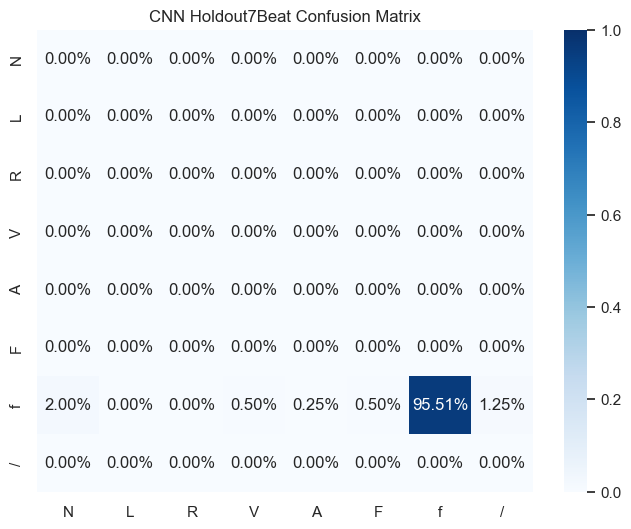

(401, 11)
(401, 275)


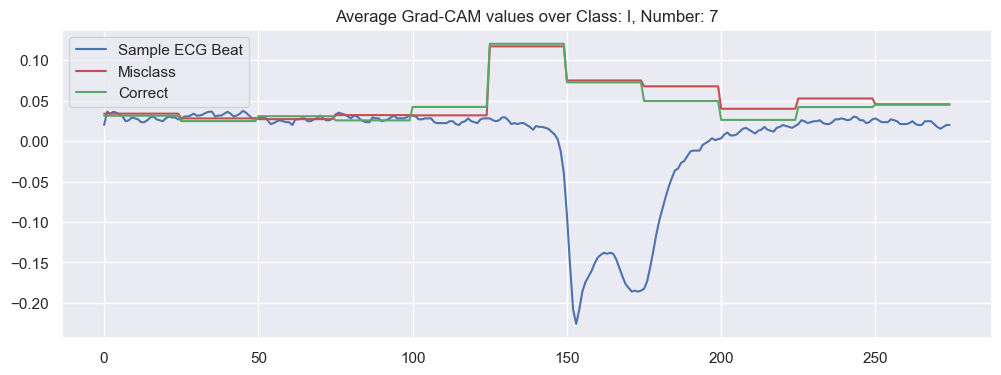

66/66 [==============================] - 0s 7ms/step
Accuracy  : 0.9932724651609803
Precision : 0.3333333333333333
Recall : 0.3310908217203268
f1score : 0.3322082931533269


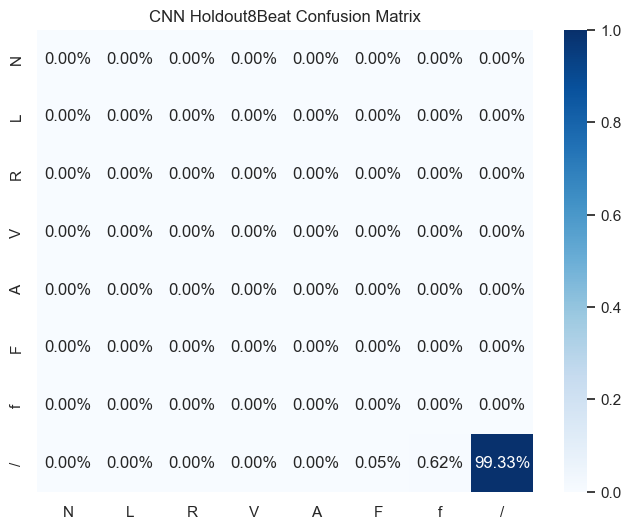

(2081, 11)
(2081, 275)


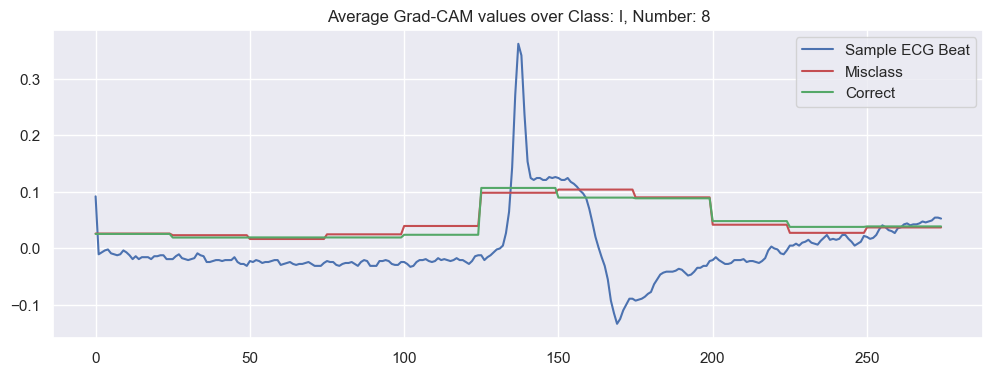

In [7]:
for class_num in range(1,9):
    class_ann = 'I'

    N_test = test_values[test_values[:,-2]==class_num]

    X_test = N_test[:,:-2]
    y_test = N_test[:len(N_test),-2]

    X_test1 = X_test.reshape(-1, X_train.shape[1], 1)
    y_test1 = to_categorical(y_test)
    cnnpredictions = cnnmodel.predict(X_test1, verbose=1)

    cnn_predict=np.argmax(cnnpredictions,axis=1)
    cnn_actual_value=np.argmax(y_test1,axis=1)
    cnn_results = showResults(cnn_actual_value, cnn_predict,'CNN')

    categories=['N','L','R','V','A','F','f','/']
    fig = plt.figure(figsize=(8,6))
    CNN_cf_m = cnn_results[5].astype('float')/ cnn_results[5].sum(axis=1)[:,np.newaxis]
    sns.heatmap(np.nan_to_num(CNN_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories,vmin=0,vmax=1,cmap='Blues')
    plt.title('CNN Holdout'+ str(class_num) + 'Beat Confusion Matrix')
    plt.show()
    fig.savefig('cm'+ str(class_num) + '.jpg', dpi = 400)

    cnnmodel.layers[-1].activation = None

    grad_model = tf.keras.models.Model([cnnmodel.inputs], [cnnmodel.get_layer('last_conv_layer').output, cnnmodel.output])

    with tf.GradientTape() as tape:
        last_conv_layer_features, y_predictions = grad_model(X_test1)
    grads = tape.gradient(y_predictions, last_conv_layer_features)

    alpha_values = tf.reduce_mean(grads, axis = 1)

    gradcam = tf.linalg.matmul(last_conv_layer_features, alpha_values[..., tf.newaxis])


    gradcam = gradcam.numpy()
    gradcam = np.abs(gradcam)
    gradcam_norm = (gradcam - np.min(gradcam, axis = 1, keepdims = True)) / (np.max(gradcam, axis = 1, keepdims = True) - 
                                                            np.min(gradcam, axis = 1, keepdims = True))
    y_predictions = tf.nn.softmax(y_predictions)
    y_predictions = y_predictions.numpy()

    correct_cnn = np.where(cnn_predict == cnn_actual_value)
    correct_cnn = correct_cnn[0].tolist()

    misclass_cnn = np.where(cnn_predict!=cnn_actual_value)
    misclass_cnn = misclass_cnn[0].tolist()

    def means_of_slices(iterable, slice_size):
        iterator = iter(iterable)
        while True:
            slice = list(islice(iterator, slice_size))
            if slice:
                yield np.sum(slice)/len(slice)
            else:
                return

    cam_per_segment = []
    for i in range(X_test1.shape[0]):
        means = list(means_of_slices(gradcam_norm[i], 25))
        cam_per_segment.append(means)
    cam_per_segment = np.array(cam_per_segment)
    print(cam_per_segment.shape)

    cam_per_segment_repeat = []
    for i in cam_per_segment:
        cam_per_segment_repeat.append(np.repeat(i,25))
    cam_per_segment_repeat = np.array(cam_per_segment_repeat)
    print(cam_per_segment_repeat.shape)

    ecg_correct_norm = normalize(cam_per_segment_repeat[correct_cnn[:1000]])
    ecg_incorrect_norm = normalize(cam_per_segment_repeat[misclass_cnn[:10]])

    ecg_norm = normalize(X_test1[:,:,0])

    mean_correct = ecg_correct_norm.mean(axis=0)
    mean_incorrect = ecg_incorrect_norm.mean(axis=0)

    plt.figure(figsize=(12,4))
    plt.plot(ecg_norm[1],color='b',label='Sample ECG Beat')
    plt.plot(np.abs(mean_incorrect), color='r', label='Misclass')
    plt.plot(np.abs(mean_correct), color='g', label='Correct')
    plt.title('Average Grad-CAM values over '+'Class: ' + class_ann +', Number: ' + str(class_num))
    plt.legend()
    plt.savefig('output_pics/cnn_gradcam_' + str(class_num) +  '.jpg', bbox_inches='tight',dpi=400)
    plt.show()